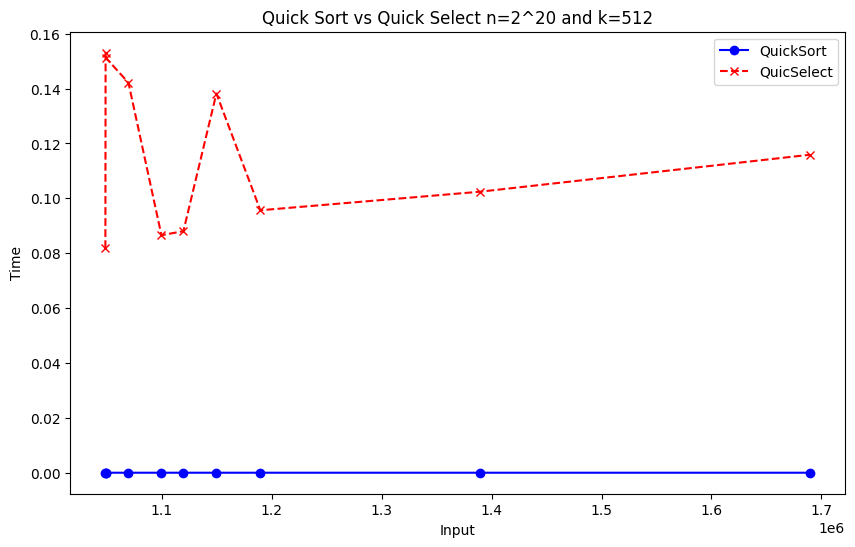

In [1]:
import random
import time
import matplotlib.pyplot as plt
import sys

input_lists=[]
time1=[]
time2=[]
in_size=[]

#implementation of partition algorithm
def partition(ls, l, h):
    pivot = ls[h]
    i = l - 1
    for j in range(l,h):
        if ls[j] <= pivot:
            i = i + 1
            (ls[i], ls[j]) = (ls[j], ls[i])
    (ls[i + 1], ls[h]) = (ls[h], ls[i + 1])
    return i + 1

#implementation of quick sort
def quickSort(li, lw, hi):
    if lw < hi:
        pi = partition(li, lw, hi)
        quickSort(li, lw, pi - 1)
        quickSort(li, pi + 1, hi)
        return pi

#implementation of quick select
def quickSelect(li,l,h,k):
    if l==h:
        return li[l]
    pivot_index = partition(li, l, h)
    if k == pivot_index:
        return li[k]
    elif k < pivot_index:
        return quickSelect(li, l, pivot_index - 1, k)
    else:
        return quickSelect(li, pivot_index + 1, h, k)

#set the recursion limit just in case if stack memory runs out
sys.setrecursionlimit(2000)

#to get the input for n above 1048576(2^20)
size =[ 1048586, 1048786, 1049586, 1069586, 1099586, 1119586, 1149586, 1189586, 1389586, 1689586, 1989586]
for _ in range(10):
    input_list = [random.randint(510,1000) for _ in range(size[_])]  # Random numbers within the given size
    # print(len(input_list))
    input_lists.append(input_list)
for j in input_lists:
  in_size.append((len(j))) # for different input sizes

#code to find the time taken by quick sort
for j in input_lists:
  n=len(input_lists)-1
  start=time.time()
  k=quickSort(j,0,n)
  end=time.time()
  time1.append(end-start)
  u=input_lists[:k]
  decimal_list = [float(element) for element in time1]
  formatted_list = ['{:.10f}'.format(element) for element in decimal_list]

#code to find the time taken by quick select
start,end=0,0
for j in input_lists:
  k=512
  start=time.time()
  for i in range(k):
    q=quickSelect(j,0,n,i)
  end=time.time()
  time2.append(end-start)

# to plot the graph
plt.figure(figsize=(10, 6))
plt.plot(in_size,time1,label='QuickSort', marker='o', linestyle='-', color='b')
plt.plot(in_size,time2,label='QuicSelect', marker='x', linestyle='--', color='r')
plt.xlabel('Input')
plt.ylabel('Time')
plt.title("Quick Sort vs Quick Select n=2^20 and k=512")
plt.legend()
plt.show()